# Tratamento de dados

- Remover colunas irrelevantes
- Dados faltantes
- Dados categóricos
- One Hot Encoding
- Dados duplicados
- Normalização
- Balanceamento
- Salvar novo CSV tratado

### **IMPORTS**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
test=pd.read_csv('Data/test.csv')
train=pd.read_csv('Data/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **REMOÇÃO DOS DADOS IRRELEVANTES**

In [3]:
#Remoção: Name, Ticket e Cabin

train.drop(columns=['Name', 'Ticket'], inplace=True)
train.drop(columns=['Cabin'], inplace=True)

### **TRATAMENTO DE DADOS FALTANTES**

In [4]:
#Dados faltantes: Age e Embarked

train.fillna({'Age':train.Age.mean()}, inplace=True)
train.fillna({'Embarked':0}, inplace=True)
#train['Embarked'].value_counts()
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### **TRATAMENTO DE DADOS CATEGÓRICOS**

In [5]:
#Dados categóricos: Sex e Embarked

train.replace({'male':0, 'female':1}, inplace=True)
train.replace({'C':0, 'Q':1, 'S':2}, inplace=True)

### **DADOS DUPLICADOS**

In [6]:
train.duplicated().value_counts()

False    891
dtype: int64

### **NORMALIZAÇÃO**

In [7]:
categorical_columns = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
numeric_data = train.drop(columns=categorical_columns, inplace=False)

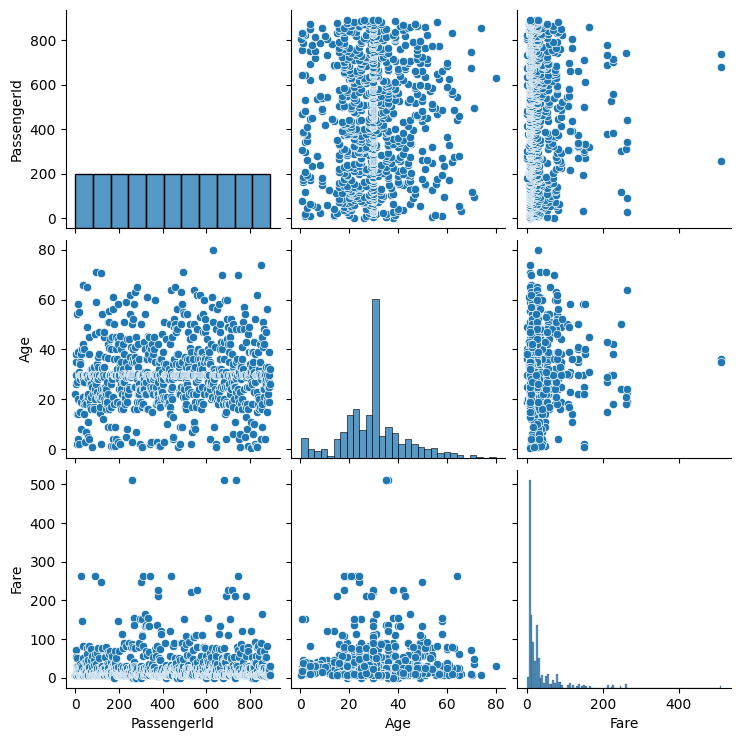

In [8]:
sns.pairplot(data=numeric_data)

In [9]:
#print(scaler.fit(data_norm), end='\n\n')
#print(type(scaler.mean_))
#print(scaler.mean_, end='\n\n')
#print(scaler.var_, end='\n\n')
#print(scaler.transform(data_norm), end='\n\n')

In [10]:
scaler = StandardScaler()
scaler.fit(numeric_data)
norm_matriz = scaler.transform(numeric_data)
norm_matriz

array([[-1.73010796, -0.5924806 , -0.50244517],
       [-1.72622007,  0.63878901,  0.78684529],
       [-1.72233219, -0.2846632 , -0.48885426],
       ...,
       [ 1.72233219,  0.        , -0.17626324],
       [ 1.72622007, -0.2846632 , -0.04438104],
       [ 1.73010796,  0.17706291, -0.49237783]])

In [11]:
#DataFrame com dados normalizados e as colunos retiradas0
train_norm = pd.DataFrame(data=norm_matriz, columns=numeric_data.columns.to_list())
train_norm

,PassengerId,Age,Fare
0,-1.730108,-0.592481,-0.502445
1,-1.726220,0.638789,0.786845
2,-1.722332,-0.284663,-0.488854
3,-1.718444,0.407926,0.420730
4,-1.714556,0.407926,-0.486337
...,...,...,...
886,1.714556,-0.207709,-0.386671
887,1.718444,-0.823344,-0.044381
888,1.722332,0.000000,-0.176263
889,1.726220,-0.284663,-0.044381


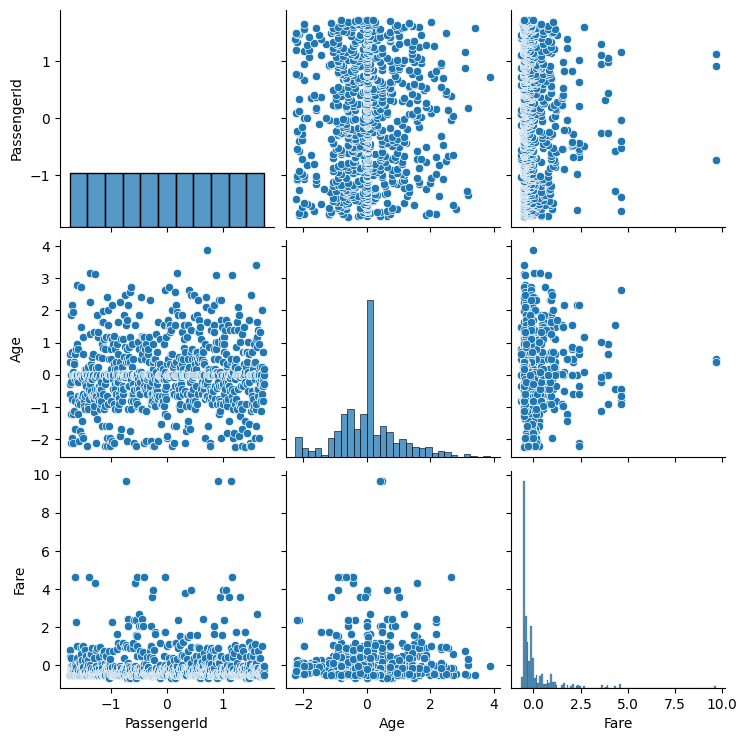

In [12]:
sns.pairplot(data=train_norm)

In [13]:
train_norm = pd.concat([train_norm, train.drop(columns=numeric_data.columns.to_list())], axis=1)
train_norm

,PassengerId,Age,Fare,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,-1.730108,-0.592481,-0.502445,0,3,0,1,0,2
1,-1.726220,0.638789,0.786845,1,1,1,1,0,0
2,-1.722332,-0.284663,-0.488854,1,3,1,0,0,2
3,-1.718444,0.407926,0.420730,1,1,1,1,0,2
4,-1.714556,0.407926,-0.486337,0,3,0,0,0,2
...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.207709,-0.386671,0,2,0,0,0,2
887,1.718444,-0.823344,-0.044381,1,1,1,0,0,2
888,1.722332,0.000000,-0.176263,0,3,1,1,2,2
889,1.726220,-0.284663,-0.044381,1,1,0,0,0,0


### **BALANCEAMENTO DOS DADOS**
- Oversampling
- Undersampling

In [14]:
train_norm.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

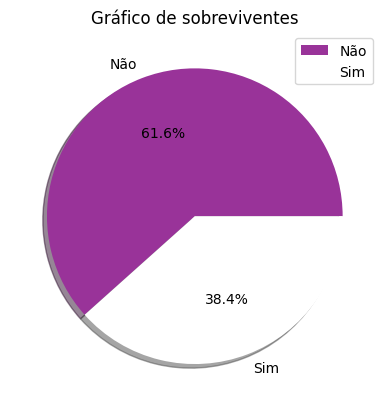

In [15]:
plt.pie(
    x=train_norm['Survived'].value_counts(), 
    labels=['Não', 'Sim'],
    colors=['#993399', '#ffffff'],
    autopct='%1.1f%%',
    shadow=True,
)
plt.title('Gráfico de sobreviventes')
plt.legend()

In [16]:
sm = SMOTE()
X_atri, y_alvo = sm.fit_resample(X=train_norm, y=train_norm['Survived'])

In [17]:
train_balance = pd.DataFrame(data=X_atri)
train_balance['Survived'] = y_alvo.to_list()
train_balance

,PassengerId,Age,Fare,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,-1.730108,-0.592481,-0.502445,0,3,0,1,0,2
1,-1.726220,0.638789,0.786845,1,1,1,1,0,0
2,-1.722332,-0.284663,-0.488854,1,3,1,0,0,2
3,-1.718444,0.407926,0.420730,1,1,1,1,0,2
4,-1.714556,0.407926,-0.486337,0,3,0,0,0,2
...,...,...,...,...,...,...,...,...,...
1093,-0.153521,1.201607,-0.413418,1,2,1,0,0,2
1094,1.035713,-0.266525,-0.415634,1,2,1,0,0,2
1095,-1.009735,-0.319104,-0.492480,1,3,1,0,0,1
1096,1.089412,0.183312,3.718377,1,1,1,0,0,1


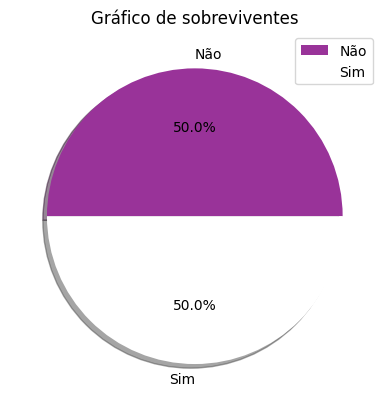

In [18]:
plt.pie(
    x=train_balance['Survived'].value_counts(), 
    labels=['Não', 'Sim'],
    colors=['#993399', '#ffffff'],
    autopct='%1.1f%%',
    shadow=True,
)
plt.title('Gráfico de sobreviventes')
plt.legend()

### **ONE HOT ENCONDING**

In [19]:
train_balance['Embarked'].value_counts()

2    777
0    226
1     95
Name: Embarked, dtype: int64

In [20]:
#Tratamento do One Hot Econding do Pclass
enconding_pclass = pd.get_dummies(train_balance['Pclass'])
enconding_pclass.rename(columns = {1:"Pclass1", 2:"Pclass2", 3:"Pclass3"}, inplace = True)
enconding_pclass

,Pclass1,Pclass2,Pclass3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
1093,0,1,0
1094,0,1,0
1095,0,0,1
1096,1,0,0


In [21]:
#Dataset com Pclass atualizado
train_balance.drop(columns=['Pclass'], inplace = True)
train_final = pd.concat([train_balance, enconding_pclass], axis = 1)
train_final

,PassengerId,Age,Fare,Survived,Sex,SibSp,Parch,Embarked,Pclass1,Pclass2,Pclass3
0,-1.730108,-0.592481,-0.502445,0,0,1,0,2,0,0,1
1,-1.726220,0.638789,0.786845,1,1,1,0,0,1,0,0
2,-1.722332,-0.284663,-0.488854,1,1,0,0,2,0,0,1
3,-1.718444,0.407926,0.420730,1,1,1,0,2,1,0,0
4,-1.714556,0.407926,-0.486337,0,0,0,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1093,-0.153521,1.201607,-0.413418,1,1,0,0,2,0,1,0
1094,1.035713,-0.266525,-0.415634,1,1,0,0,2,0,1,0
1095,-1.009735,-0.319104,-0.492480,1,1,0,0,1,0,0,1
1096,1.089412,0.183312,3.718377,1,1,0,0,1,1,0,0


In [22]:
##Tratamento do One Hot Econding do Embarked
enconding_embarked = pd.get_dummies(train_balance['Embarked'])
enconding_embarked.rename(columns = {0:"Cherbourg", 1:"Queenstow", 2:"Southampton"},inplace = True)
enconding_embarked

,Cherbourg,Queenstow,Southampton
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1093,0,0,1
1094,0,0,1
1095,0,1,0
1096,0,1,0


In [23]:
#Dataset com Embarked atualizado
train_final.drop(columns=['Embarked'], inplace=True)
train_final = pd.concat([train_final, enconding_embarked], axis = 1)
train_final

,PassengerId,Age,Fare,Survived,Sex,SibSp,Parch,Pclass1,Pclass2,Pclass3,Cherbourg,Queenstow,Southampton
0,-1.730108,-0.592481,-0.502445,0,0,1,0,0,0,1,0,0,1
1,-1.726220,0.638789,0.786845,1,1,1,0,1,0,0,1,0,0
2,-1.722332,-0.284663,-0.488854,1,1,0,0,0,0,1,0,0,1
3,-1.718444,0.407926,0.420730,1,1,1,0,1,0,0,0,0,1
4,-1.714556,0.407926,-0.486337,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,-0.153521,1.201607,-0.413418,1,1,0,0,0,1,0,0,0,1
1094,1.035713,-0.266525,-0.415634,1,1,0,0,0,1,0,0,0,1
1095,-1.009735,-0.319104,-0.492480,1,1,0,0,0,0,1,0,1,0
1096,1.089412,0.183312,3.718377,1,1,0,0,1,0,0,0,1,0


### **SALVAR DATASET EM DISCO**

In [35]:
train_final.to_csv('~/workspace/Estrela/Data/Train_final.csv')   